In [ ]:
#DATA CLEANING AND PREPROCESSING

import pandas as pd
a = pd.read_csv("C:/Users/VijayAnand/Downloads/E-commerce dataset.csv")
print(a.info())
print(a.describe())
print(a.duplicated().sum())

In [ ]:
#DATA CLEANING AND PREPROCESSING

import pandas as pd
a = pd.read_csv("C:/Users/VijayAnand/Downloads/E-commerce dataset.csv")
print(a.info())
print(a.describe())
print(a.duplicated().sum())

Dataset shape: (3000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           3000 non-null   object 
 1   customer_id              3000 non-null   object 
 2   transaction_date         3000 non-null   object 
 3   customer_age             3000 non-null   int64  
 4   customer_location        3000 non-null   object 
 5   quantity                 3000 non-null   int64  
 6   unit_price               3000 non-null   float64
 7   total_amount             3000 non-null   float64
 8   payment_method           3000 non-null   object 
 9   shipping_speed           3000 non-null   object 
 10  customer_history_orders  3000 non-null   int64  
 11  discount_applied         3000 non-null   bool   
 12  discount_percentage      3000 non-null   float64
 13  shipping_cost            3000 non-null   float64
 14

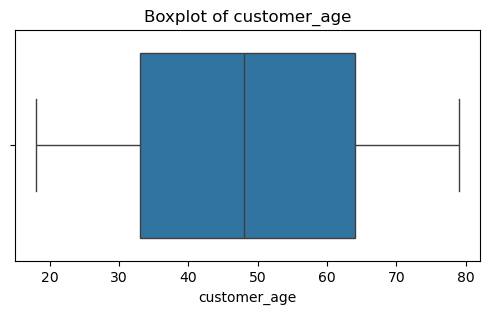

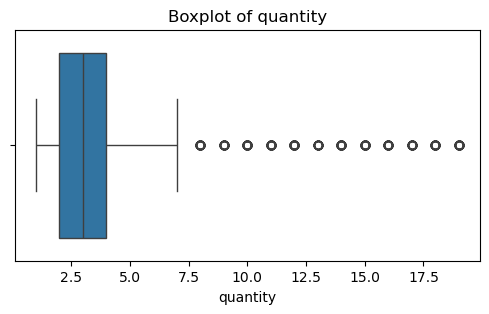

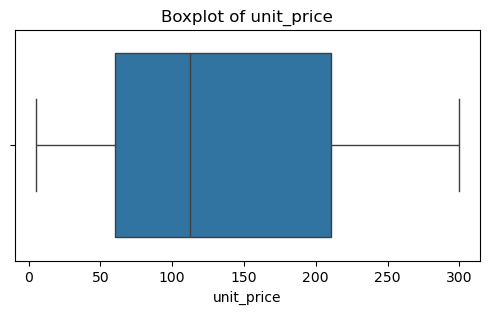

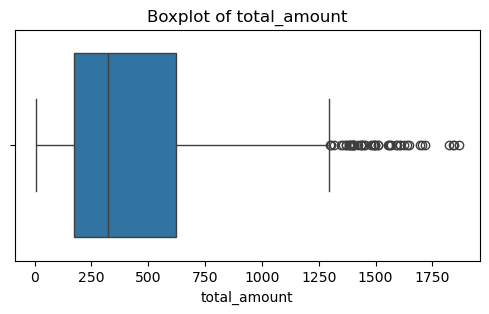

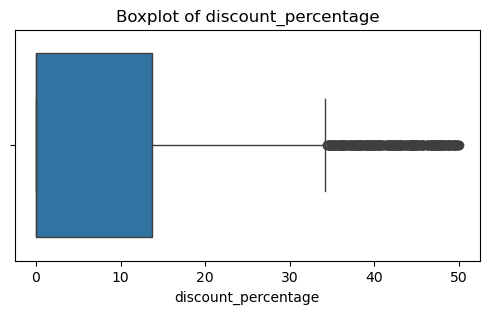

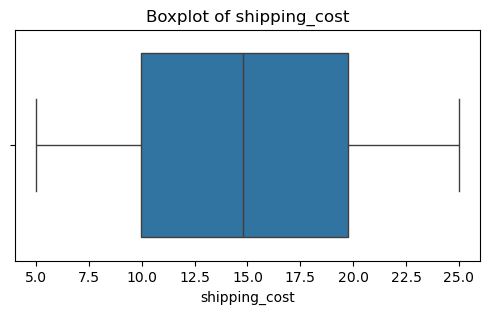

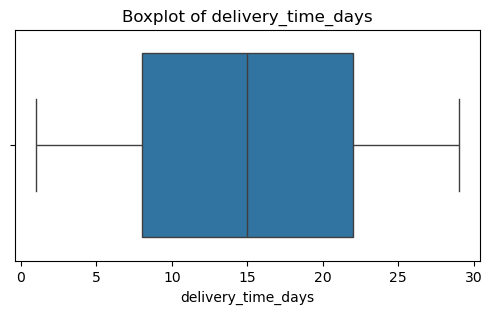

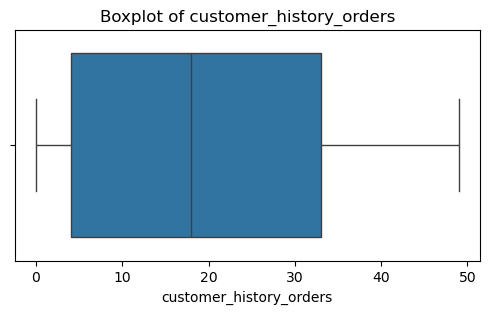

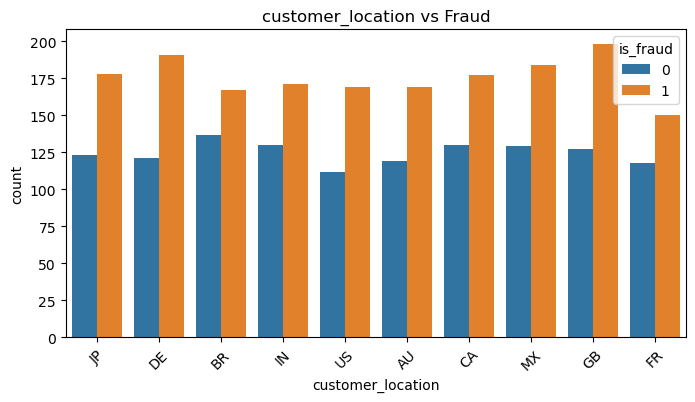

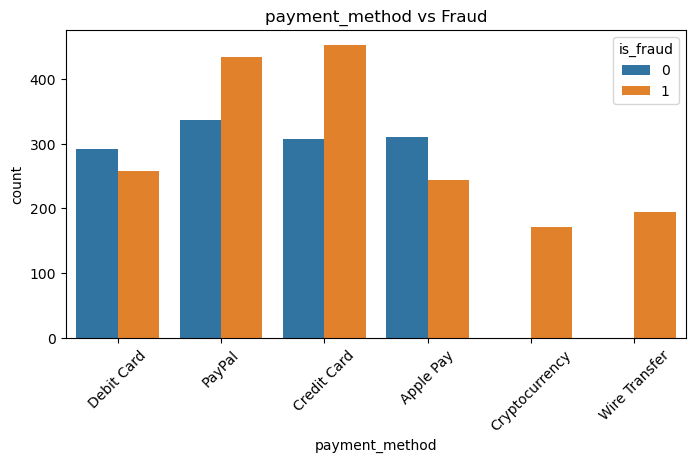

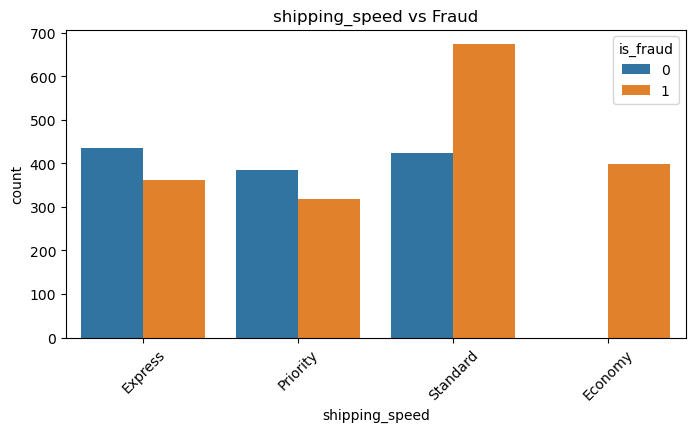


Fraud rate by discount_applied:
discount_applied
False    0.592557
True     0.567132
Name: is_fraud, dtype: float64

Fraud rate by refund_requested:
refund_requested
False    0.493496
True     1.000000
Name: is_fraud, dtype: float64

Fraud rate by velocity_flag:
velocity_flag
False    0.534727
True     1.000000
Name: is_fraud, dtype: float64

Fraud rate by geolocation_mismatch:
geolocation_mismatch
False    0.504573
True     1.000000
Name: is_fraud, dtype: float64

Fraud rate by device_fingerprint_new:
device_fingerprint_new
False    0.487454
True     1.000000
Name: is_fraud, dtype: float64

Fraud rate by involves_counterfeit:
involves_counterfeit
False    0.450375
True     1.000000
Name: is_fraud, dtype: float64


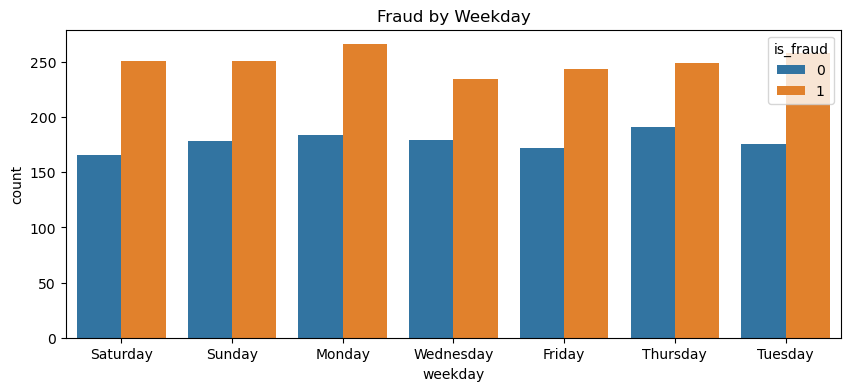

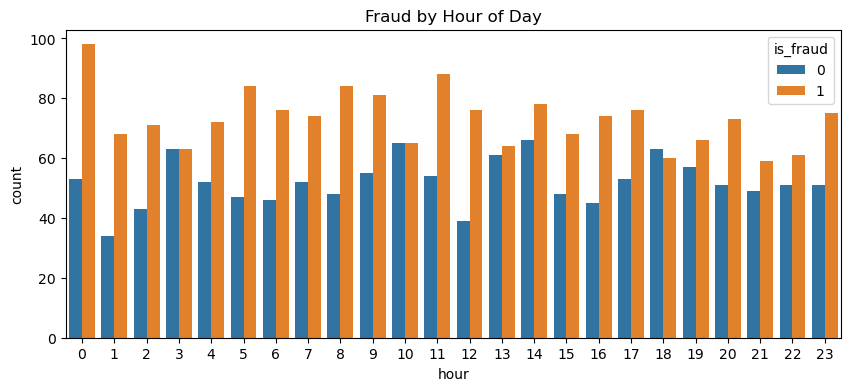

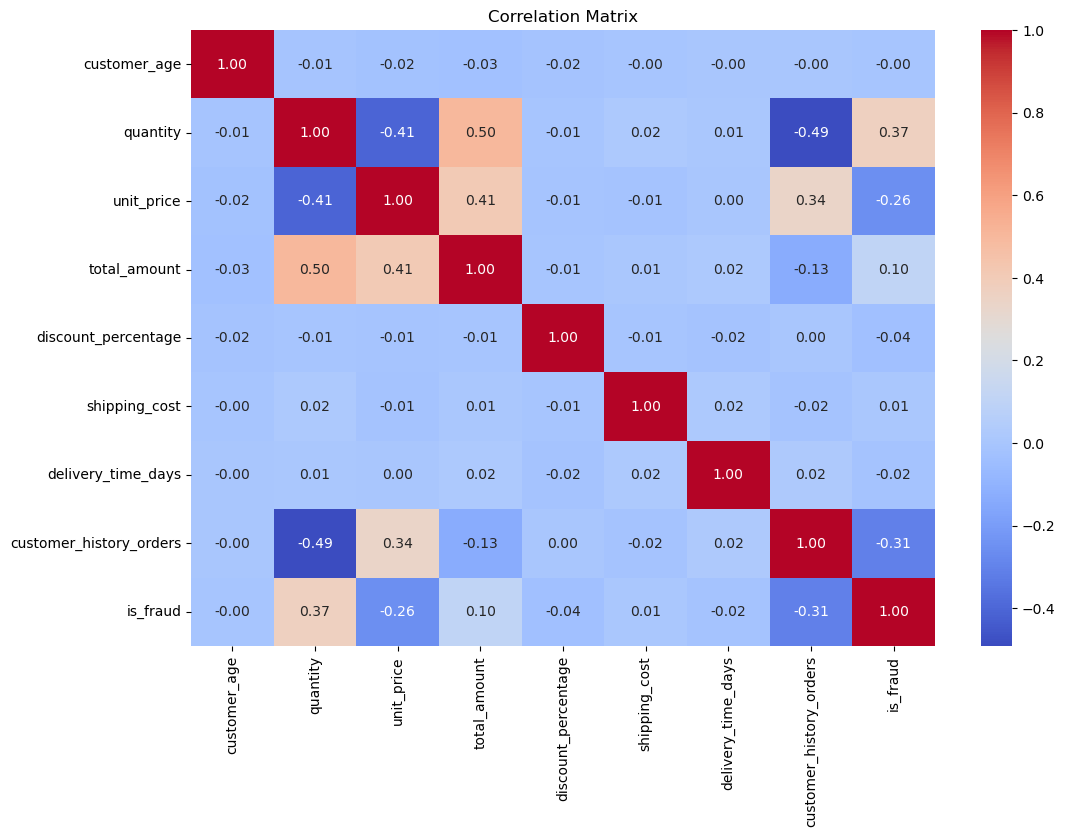

   average_order_value  high_discount_flag  repeat_customer_flag
0           199.660000                   0                     1
1           116.007500                   0                     1
2            42.040000                   0                     1
3           147.693333                   0                     1
4            40.700000                   0                     1

--- EDA Complete ---
You can now proceed to data preprocessing and model building.


In [10]:
# EXPLORATORY DATA ANALYSIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# 1. Load Dataset
# -------------------------
df = pd.read_csv("C:/Users/VijayAnand/Downloads/E-commerce dataset.csv")  # replace with your file path
pd.set_option('display.max_columns', None)
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

# -------------------------
# 2. Create Target Column
# -------------------------
fraud_cols = ['refund_requested', 'velocity_flag', 'geolocation_mismatch', 
              'device_fingerprint_new', 'involves_counterfeit']

# Create a single fraud indicator
df['is_fraud'] = df[fraud_cols].any(axis=1).astype(int)
print("Fraud distribution:\n", df['is_fraud'].value_counts())

# -------------------------
# 3. Summary Statistics
# -------------------------
num_cols = ['customer_age', 'quantity', 'unit_price', 'total_amount',
            'discount_percentage', 'shipping_cost', 'delivery_time_days',
            'customer_history_orders']

print("\nNumerical Summary:")
print(df[num_cols].describe())

# Boxplots for outliers
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

# -------------------------
# 4. Categorical Analysis
# -------------------------
cat_cols = ['customer_location', 'payment_method', 'shipping_speed']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='is_fraud', data=df)
    plt.title(f'{col} vs Fraud')
    plt.xticks(rotation=45)
    plt.show()

# -------------------------
# 5. Boolean Columns Analysis
# -------------------------
bool_cols = ['discount_applied', 'refund_requested', 'velocity_flag', 
             'geolocation_mismatch', 'device_fingerprint_new', 'involves_counterfeit']

for col in bool_cols:
    fraud_rate = df.groupby(col)['is_fraud'].mean()
    print(f"\nFraud rate by {col}:\n{fraud_rate}")

# -------------------------
# 6. Time-Based Analysis (Fixed)
# -------------------------
# Convert date with dayfirst=True
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True, errors='coerce')

# Extract time features
df['weekday'] = df['transaction_date'].dt.day_name()
df['hour'] = df['transaction_date'].dt.hour

plt.figure(figsize=(10,4))
sns.countplot(x='weekday', hue='is_fraud', data=df)
plt.title('Fraud by Weekday')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='hour', hue='is_fraud', data=df)
plt.title('Fraud by Hour of Day')
plt.show()

# -------------------------
# 7. Correlation Analysis
# -------------------------
plt.figure(figsize=(12,8))
corr = df[num_cols + ['is_fraud']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# -------------------------
# 8. Feature Engineering Ideas
# -------------------------
df['average_order_value'] = df['total_amount'] / df['quantity']
df['high_discount_flag'] = (df['discount_percentage'] > 50).astype(int)
df['repeat_customer_flag'] = (df['customer_history_orders'] > 5).astype(int)

# Show first few rows of engineered features
print(df[['average_order_value', 'high_discount_flag', 'repeat_customer_flag']].head())

# -------------------------
# 9. Summary of Insights
# -------------------------
print("\n--- EDA Complete ---")
print("You can now proceed to data preprocessing and model building.")


In [1]:
# FEATURE ENGINEERING

import pandas as pd
import numpy as np

# -------------------------
# 1. Load Dataset
# -------------------------
# Change file name to your actual dataset (Excel or CSV)
file_path = "C:/Users/VijayAnand/Downloads/E-commerce dataset.csv"   # e.g., "fraud_data.xlsx" or "fraud_data.csv"

if file_path.endswith(".xlsx"):
    df = pd.read_excel(file_path)
else:
    df = pd.read_csv(file_path)

# Convert date column safely
df['transaction_date'] = pd.to_datetime(df['transaction_date'], 
                                        dayfirst=True, errors='coerce')

# -------------------------
# 2. Feature Engineering
# -------------------------

# 2.1 High Value Transaction (90th percentile)
threshold_high = df['total_amount'].quantile(0.90)
df['high_value_flag'] = df['total_amount'] > threshold_high

# 2.2 Transaction Velocity (per customer per day)
df['transaction_day'] = df['transaction_date'].dt.date
df['daily_txn_count'] = df.groupby(['customer_id','transaction_day'])['transaction_id'].transform('count')
df['velocity_flag_engineered'] = df['daily_txn_count'] > 3   # example threshold

# 2.3 Suspicious Discount
df['suspicious_discount'] = df['discount_percentage'] > 50

# 2.4 Refund Rate per Customer
df['customer_refund_rate'] = df.groupby('customer_id')['refund_requested'].transform('mean')
df['frequent_refunder'] = df['customer_refund_rate'] > 0.3   # >30% refunds

# 2.5 Shipping Speed Risk (check column exists first)
if 'shipping_speed' in df.columns:
    df['shipping_risk'] = df['shipping_speed'].str.lower().isin(['express','overnight'])
else:
    df['shipping_risk'] = False

# 2.6 Delivery Time Anomaly (IQR method)
if 'delivery_time_days' in df.columns:
    median_delivery = df['delivery_time_days'].median()
    iqr_delivery = df['delivery_time_days'].quantile(0.75) - df['delivery_time_days'].quantile(0.25)
    df['delivery_anomaly'] = (df['delivery_time_days'] > median_delivery + 2*iqr_delivery) | \
                             (df['delivery_time_days'] < median_delivery - 2*iqr_delivery)
else:
    df['delivery_anomaly'] = False

# 2.7 Combined Fraud Risk Score
risk_cols = [col for col in [
    'high_value_flag', 
    'velocity_flag_engineered',
    'suspicious_discount',
    'frequent_refunder',
    'shipping_risk',
    'delivery_anomaly',
    'geolocation_mismatch' if 'geolocation_mismatch' in df.columns else None,
    'device_fingerprint_new' if 'device_fingerprint_new' in df.columns else None,
    'involves_counterfeit' if 'involves_counterfeit' in df.columns else None
] if col in df.columns]

df['fraud_risk_score'] = df[risk_cols].sum(axis=1)

# -------------------------
# 3. Inspect Results
# -------------------------
print("\nSample with engineered features:")
print(df[['transaction_id','customer_id','total_amount','high_value_flag',
          'velocity_flag_engineered','suspicious_discount','frequent_refunder',
          'shipping_risk','delivery_anomaly','fraud_risk_score']].head())

# Save enhanced dataset
df.to_excel("fraud_data_engineered.xlsx", index=False)
print("\n✅ Feature engineering completed. File saved as fraud_data_engineered.xlsx")



Sample with engineered features:
  transaction_id customer_id  total_amount  high_value_flag  \
0     TXN_957334  CUST_11907        199.66            False   
1     TXN_246397  CUST_27641        464.03            False   
2     TXN_403072  CUST_78628         42.04            False   
3     TXN_848560  CUST_98579        443.08            False   
4     TXN_270817  CUST_67519        162.80            False   

   velocity_flag_engineered  suspicious_discount  frequent_refunder  \
0                     False                False              False   
1                     False                False              False   
2                     False                False              False   
3                     False                False              False   
4                     False                False              False   

   shipping_risk  delivery_anomaly  fraud_risk_score  
0           True             False                 1  
1           True             False                

In [6]:
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 8.4 MB/s eta 0:00:07
   -- ------------------------------------- 3.1/56.8 MB 9.2 MB/s eta 0:00:06
   --- ------------------------------------ 5.0/56.8 MB 8.4 MB/s eta 0:00:07
   ---- ----------------------------------- 6.3/56.8 MB 8.1 MB/s eta 0:00:07
   ----- ---------------------------------- 8.1/56.8 MB 7.9 MB/s eta 0:00:07
   ------ --------------------------------- 9.4/56.8 MB 7.9 MB/s eta 0:00:06
   ------- -------------------------------- 10.2/56.8 MB 7.3 MB/s eta 0:00:07
   ------- -------------------------------- 11.3/56.8 MB 7.0 MB/s eta 0:00:07
   -------- ------------------------------- 12.6/56.8 MB 6.8 MB/s eta 0:00:07
   --------- ------------------------------ 13.6/56.8 MB 6.7 MB/s eta 0:00:07
   ---------- ----------------------------- 14.9/56.8 MB 6.6 MB/s eta 0:00:07
   ----------- ---------------------------- 16.5/56.8 MB 6.7 MB/s eta 0:00:07


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1228, number of negative: 872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

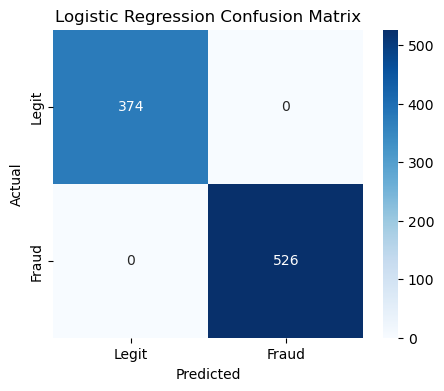

--- Random Forest ---
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000



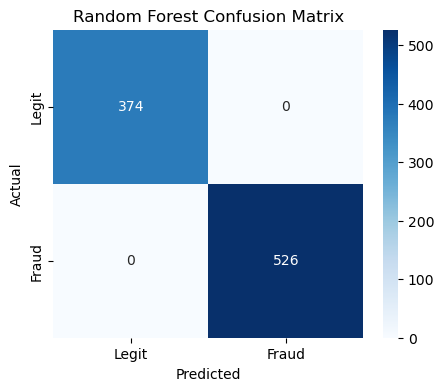

--- XGBoost ---
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000



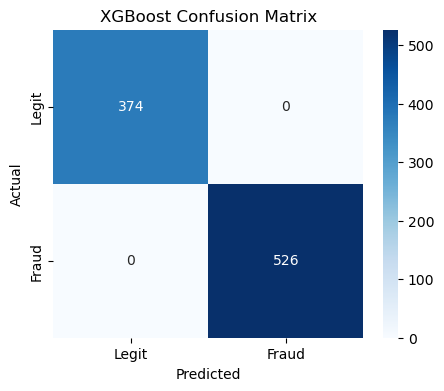

--- LightGBM ---
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000



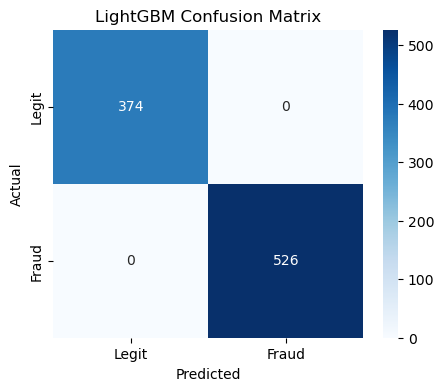

--- Neural Network ---
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000
ROC-AUC:   1.0000



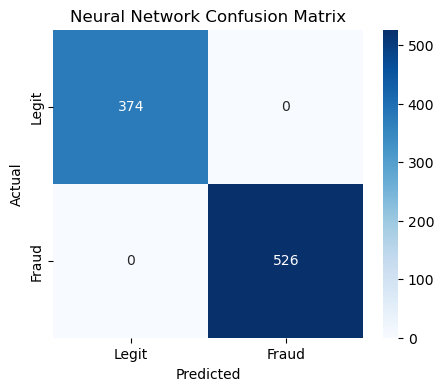

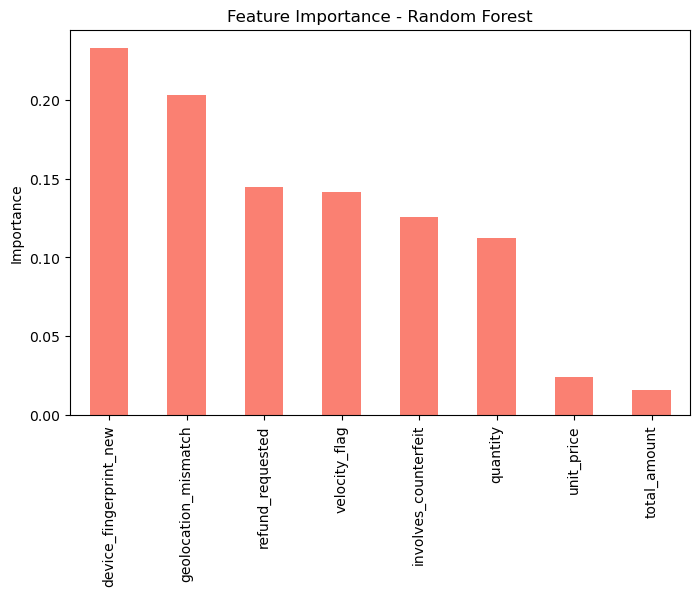

In [23]:
# DATA MODELING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# -------------------------
# 1. Split Dataset
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features for Logistic Regression and Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 2. Logistic Regression (Baseline)
# -------------------------
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# -------------------------
# 3. Random Forest
# -------------------------
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# -------------------------
# 4. XGBoost
# -------------------------
xgb_model = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# -------------------------
# 5. LightGBM
# -------------------------
lgb_model = LGBMClassifier(
    n_estimators=100,
    class_weight='balanced',
    num_leaves=31,
    min_data_in_leaf=20,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# -------------------------
# 6. Neural Network (Simple)
# -------------------------
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Precision','Recall','AUC'])
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
y_prob_nn = nn_model.predict(X_test_scaled).ravel()
y_pred_nn = (y_prob_nn > 0.5).astype(int)

# -------------------------
# 7. Evaluation Function
# -------------------------
def evaluate_model(y_test, y_pred, y_prob, model_name):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"--- {model_name} ---")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# -------------------------
# 8. Evaluate All Models
# -------------------------
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lgb, y_prob_lgb, "LightGBM")
evaluate_model(y_test, y_pred_nn, y_prob_nn, "Neural Network")

# -------------------------
# 9. Feature Importance (Random Forest example)
# -------------------------
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='salmon')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()


Model Evaluation Metrics:
-------------------------
Precision: 1.0000  (how many predicted frauds were correct)
Recall:    1.0000  (how many actual frauds were caught)
F1-Score:  1.0000  (balance of precision and recall)
ROC-AUC:   1.0000  (overall performance)


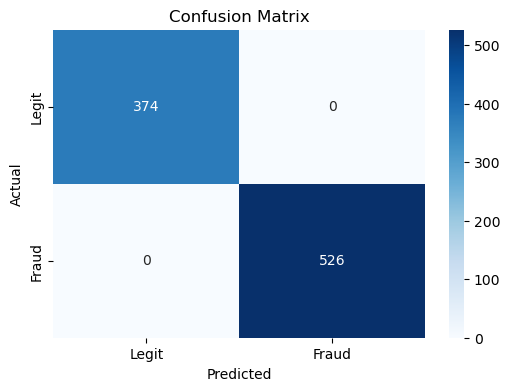

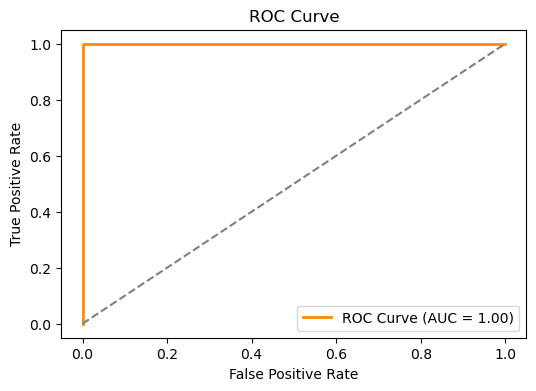


Detailed Classification Report:
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00       374
       Fraud       1.00      1.00      1.00       526

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



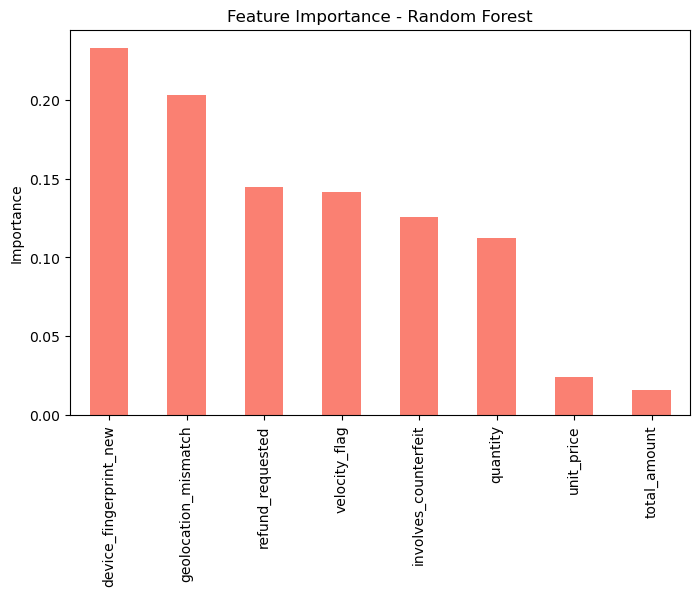


✅ Model saved as 'fraud_detection_model.pkl'.


In [24]:
# DATA EVALUATION

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# -------------------------
# 1. Split Dataset (if not already split)
# -------------------------
# X: features, y: target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------
# 2. Train Random Forest Classifier
# -------------------------
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Important for imbalanced fraud dataset
)
model.fit(X_train, y_train)

# -------------------------
# 3. Make Predictions
# -------------------------
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# -------------------------
# 4. Evaluate Metrics
# -------------------------
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print("-------------------------")
print(f"Precision: {precision:.4f}  (how many predicted frauds were correct)")
print(f"Recall:    {recall:.4f}  (how many actual frauds were caught)")
print(f"F1-Score:  {f1:.4f}  (balance of precision and recall)")
print(f"ROC-AUC:   {roc_auc:.4f}  (overall performance)")

# -------------------------
# 5. Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# -------------------------
# 6. ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', linewidth=2)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# -------------------------
# 7. Classification Report
# -------------------------
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legit','Fraud']))

# -------------------------
# 8. Feature Importance
# -------------------------
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='salmon')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()

# -------------------------
# 9. Save the Trained Model
# -------------------------
joblib.dump(model, 'fraud_detection_model.pkl')
print("\n✅ Model saved as 'fraud_detection_model.pkl'.")


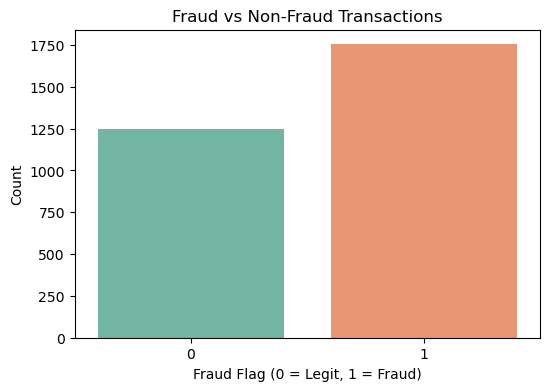

C:\Users\VijayAnand\AppData\Local\Temp\ipykernel_6944\3464193820.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='Reds')


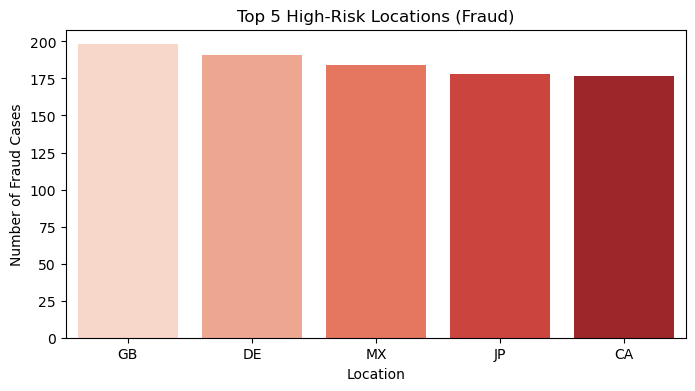

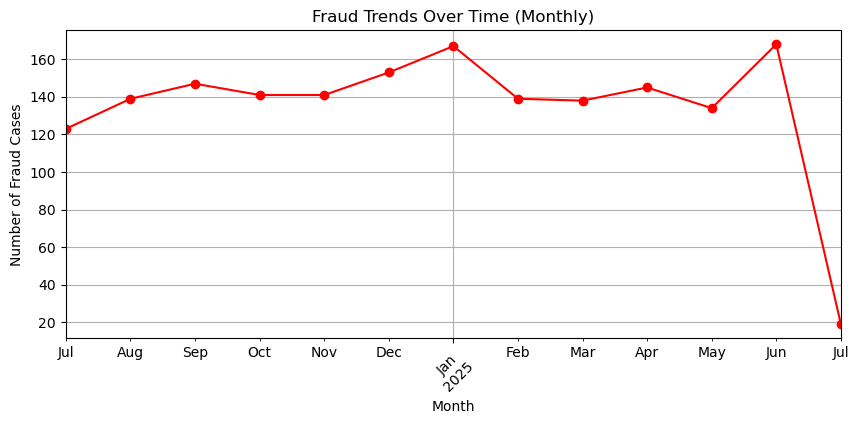

C:\Users\VijayAnand\AppData\Local\Temp\ipykernel_6944\3464193820.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_fraud.index, y=payment_fraud.values, palette='Blues')


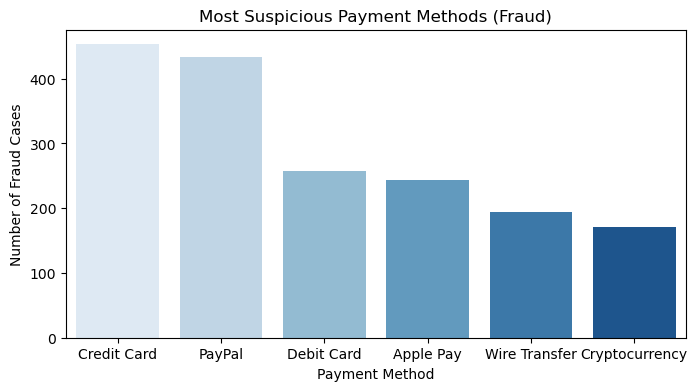

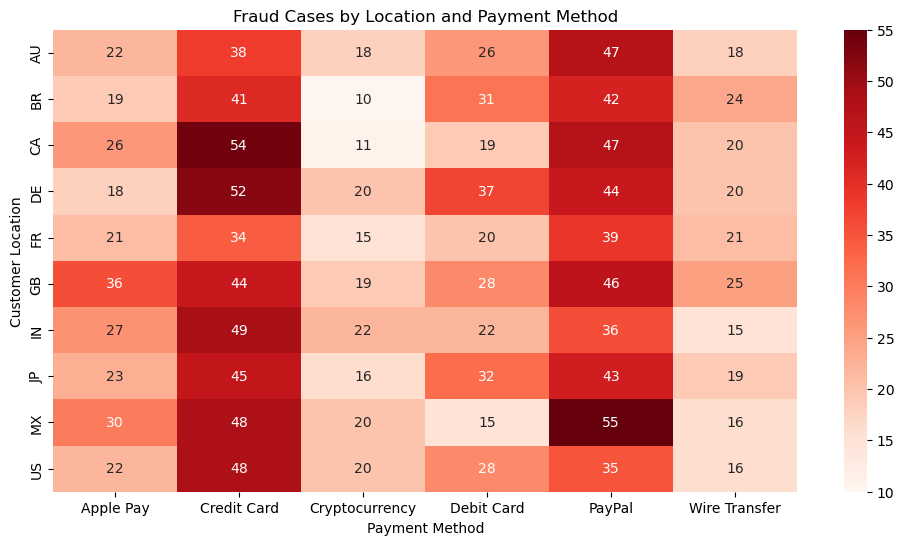

In [25]:
# DATA VISUALIZATION & INSIGHTS

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------
# 1. Fraud vs Non-Fraud Counts
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='fraud_flag', hue='fraud_flag', data=df, palette='Set2', legend=False)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Flag (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# -------------------------
# 2. Top 5 High-Risk Locations
# -------------------------
if 'customer_location' in df.columns:
    top_locations = df[df['fraud_flag']==1]['customer_location'].value_counts().head(5)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_locations.index, y=top_locations.values, palette='Reds')
    plt.title("Top 5 High-Risk Locations (Fraud)")
    plt.xlabel("Location")
    plt.ylabel("Number of Fraud Cases")
    plt.show()

# -------------------------
# 3. Fraud Trends Over Time
# -------------------------
if 'transaction_date' in df.columns:
    # Ensure transaction_date is datetime
    df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True, errors='coerce')
    df['month'] = df['transaction_date'].dt.to_period('M')
    
    monthly_fraud = df.groupby('month')['fraud_flag'].sum()
    plt.figure(figsize=(10,4))
    monthly_fraud.plot(kind='line', marker='o', color='red')
    plt.title("Fraud Trends Over Time (Monthly)")
    plt.xlabel("Month")
    plt.ylabel("Number of Fraud Cases")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# -------------------------
# 4. Most Suspicious Payment Methods
# -------------------------
if 'payment_method' in df.columns:
    payment_fraud = df[df['fraud_flag']==1]['payment_method'].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=payment_fraud.index, y=payment_fraud.values, palette='Blues')
    plt.title("Most Suspicious Payment Methods (Fraud)")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Fraud Cases")
    plt.show()

# -------------------------
# 5. Optional: Fraud Heatmap by Location and Payment Method
# -------------------------
if 'customer_location' in df.columns and 'payment_method' in df.columns:
    fraud_heatmap = pd.crosstab(
        df['customer_location'], 
        df['payment_method'], 
        values=df['fraud_flag'], 
        aggfunc='sum'
    ).fillna(0)
    
    plt.figure(figsize=(12,6))
    sns.heatmap(fraud_heatmap, annot=True, fmt=".0f", cmap='Reds')
    plt.title("Fraud Cases by Location and Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Customer Location")
    plt.show()
